In [1]:
import pandas as pd
import numpy as np
import missingno as msno 
import datetime

### Cargar año 2020.

In [2]:
df1 = pd.read_excel("1ra.xlsx")
df2 = pd.read_excel("2da.xlsx")
df3 = pd.read_excel("3ra.xlsx")
df4 = pd.read_excel("4ta.xlsx")
df5 = pd.read_excel("5ta.xlsx")
df6 = pd.read_excel("6ta.xlsx")
df7 = pd.read_excel("7ma.xlsx")
df8 = pd.read_excel("8va.xlsx")

### Limpieza básica de datos

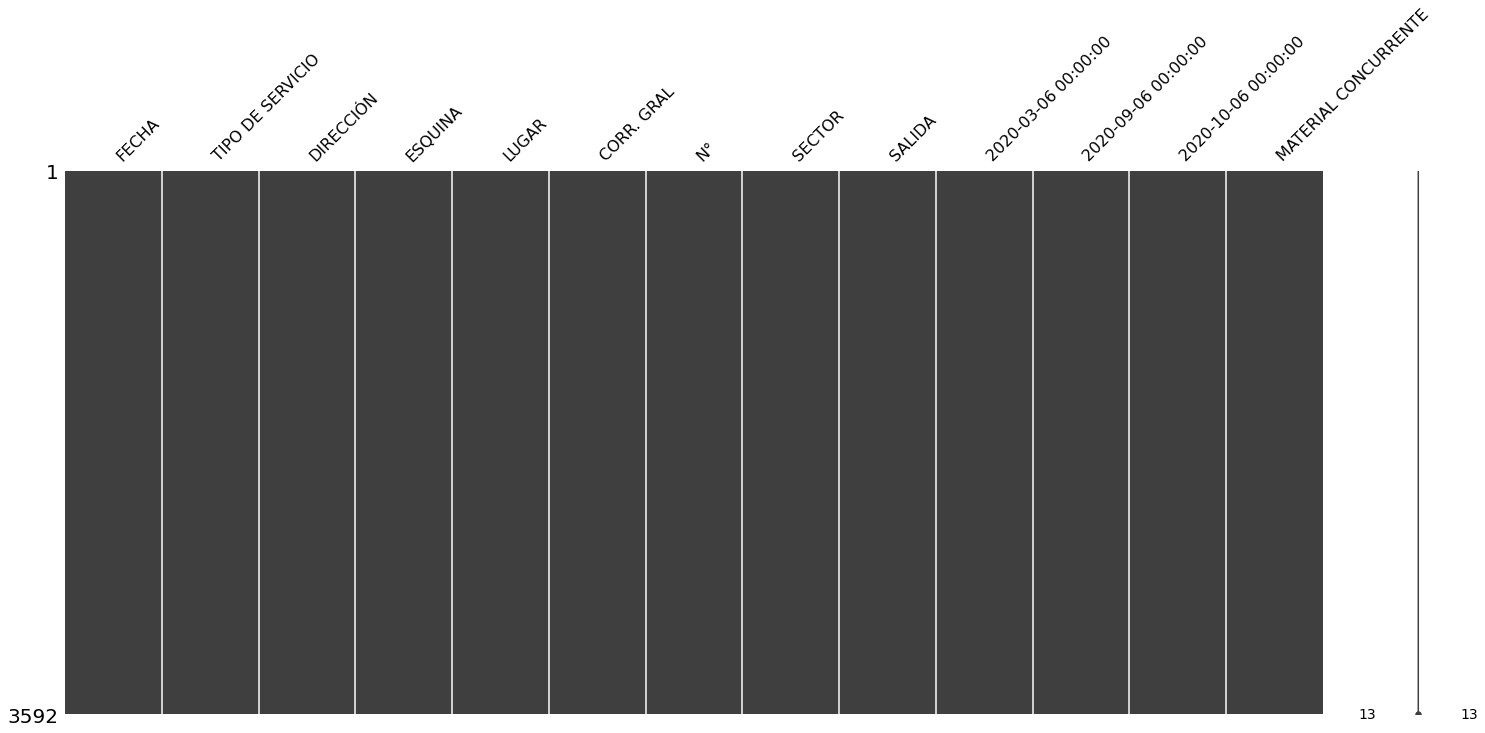

In [3]:
dfc = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8], ignore_index = True)
dfc = dfc.drop(['Unnamed: 14',
                'Unnamed: 15',          'Unnamed: 16',          'Unnamed: 17',
                'Unnamed: 18',          'Unnamed: 19',          'Unnamed: 20',
                'Unnamed: 21',          'Unnamed: 22',          'Unnamed: 23',
                'Unnamed: 24',          'Unnamed: 25',          'Unnamed: 26',
                'Unnamed: 27',          'Unnamed: 28'],axis = 1)
dfc = dfc.drop(['NUMERACIÓN'], axis = 1)
dfc = dfc.dropna()

# Visualize missing values as a matrix 
msno.matrix(dfc.dropna())

Data limpia.

### Estandarización de Data.

Renombramos las columnas

In [4]:
# Notar que:
#  c_g:= Numero de correlativo general.
#  c_e:= Numero de correlativo específico por tipo de llamado.
#              Ej: Si existen dos llamados de tipo 10-3 y uno de tipo 10-4, el c_e para el último 10-3 sería 2
#                 y el c_3 el último 10-4 sería 1, mientras que c_g sería 3.


dfc.columns = ['fecha', 'tipo_de_servicio', 'direccion',  'esquina', 'lugar', 'c_g',
                'c_e', 'sector', 'salida',  '6_3', '6_9', '6_10',  'material_concurrente']

Reducimos el espectro de tipo_de_servicio, agregandole generalidad a los datos, ie, eliminando las terminaciones 10.4.1 por ejemplo y quedando en 10.4

In [5]:
servicios ={'10-0-1': "10.0",'10.0.1': "10.0",'10.0.2': "10.0",'10.0.3': "10.0",'10.0.4':"10.0",
            '2DA. ALARMA DE IIOO':"10.0" ,'1RA. ALARMA DE IIOO':"10.0",
             
            '10.1.1': "10.1",'10.1.3':"10.1",'10.1.2': "10.1",
             
            '1RA. ALARMA DE IIOO PASTIZAL':"10.2",'2DA. ALARMA DE IIOO PASTIZAL':"10.2",'1ra. ALARMA IIOO PASTIZAL':"10.2",
            
            '10.3.1':"10.3",'10.3.6':"10.3",'10.3.7':"10.3",'10.3.4':"10.3",'10.3.1C ': "10.3",
            '10.3.1C': "10.3",'10.3.1 C':"10.3",'10.3.5':"10.3",'10.3.3':"10.3",'10.3.2':"10.3",
            
            '10.4.1':"10.4" , '10.4.1C': "10.4",'10.4.1 C': "10.4",'10.4.2': "10.4",'10.4.3':"10.4",'10.4.4':"10.4",
             '10.4.5': "10.4",'10.4.6':"10.4",'10.6.1':"10.6",'10.6.2':"10.6"
            }

dfc = dfc.assign(tipo_de_servicio = lambda x: x['tipo_de_servicio'].replace(servicios) )
dfc.head(10)

,fecha,tipo_de_servicio,direccion,esquina,lugar,c_g,c_e,sector,salida,6_3,6_9,6_10,material_concurrente
0,2020-01-01,10.4,LOS PAJARITOS,ANUNCIACIÓN,VÍA PÚBLICA,3.0,1.0,14.0,04:50:00,04:57:00,06:19:00,06:25:00,R1-B7
1,2020-01-01,10.0,AGUADA SUR,3 PONIENTE,CAMPAMENTO AGUADA SUR,6.0,1.0,4.0,15:23:00,15:30:00,17:19:00,17:26:00,B1-H2-Z2-BX3-Q4-R5-B7-B8-K1-LT1
2,2020-01-01,10.2,AV. FERROCARRIL,JOSÉ MANUEL IRARRAZAVAL,VÍA PÚBLICA,9.0,3.0,5.0,19:20:00,19:27:00,19:49:00,19:53:00,B1
3,2020-01-02,10.3,COMARCA,SANTA ELENA,VÍA PÚBLICA,21.0,5.0,2.0,22:20:00,22:25:00,22:39:00,22:48:00,R1
4,2020-01-03,10.4,SAGITARIO,RAFAEL RIESCO BERNALES,VÍA PÚBLICA,23.0,1.0,14.0,12:48:00,12:54:00,13:44:00,14:18:00,R3-R6-B1
5,2020-01-03,10.1,LOS PAJARITOS,SANTIAGO BUERAS,SUPERMERCADO JUMBO,25.0,1.0,3.0,17:31:00,17:37:00,18:02:00,18:10:00,B1
6,2020-01-04,10.3,AV. 5 DE ABRIL,MONUMENTO,LOCAL COMERCIAL CORONA,36.0,11.0,1.0,10:59:00,11:01:00,11:31:00,11:35:00,R1
8,2020-01-04,10.4,LOS PAJARITOS,SAN JOSÉ,VÍA PÚBLICA,38.0,2.0,1.0,14:50:00,14:52:00,15:09:00,15:13:00,R1-BX3
9,2020-01-04,10.3,LOS PAJARITOS,BELARMINO OSORIO,BUS TRANSANTIAGO,40.0,12.0,2.0,20.35,20:36:00,20:52:00,20:57:00,R1
10,2020-01-05,10.9,TEATRO MUNICIPAL,CLAUDIO ARRAU,VÍA PÚBLICA,43.0,6.0,28.0,11:09:00,0.10,11:21:00,11:32:00,R1


Notar que las columnas *6-3*, *6-9* y *6-10* son de tipo *object*, porque tienen fechas que no tienen el formato que corresponde, lo cual se cambiará.

In [6]:
dfc.dtypes

fecha                   datetime64[ns]
tipo_de_servicio                object
direccion                       object
esquina                         object
lugar                           object
c_g                            float64
c_e                            float64
sector                         float64
salida                          object
6_3                             object
6_9                             object
6_10                            object
material_concurrente            object
dtype: object

In [7]:
horas_posibles = []

for hora in range(24):
    for minuto in range(60):
        horas_posibles.append( datetime.time(hora, minuto) )
        
change = list(dfc.salida.apply(lambda x: x not in horas_posibles))

Dado que todas esas horas están en un formato equivocado, haremos un diccionario con todas las posibles combinaciones de horas malas, para luego poder redefiniarlas en el formato deseado **(hh:mm:ss)**.

In [8]:
dfc.iloc[8]['salida'] # Notar que es tipo str.

'20.35'

Creamos una función auxiliar para automatizar el proceso a través de un apply.

In [9]:
def transform_to_time(i):
    string = str(i)
    if len(string.split('.')) == 1:
        hora   = string.split('.')[0]
        minuto = 0
    else:
        hora, minuto = string.split('.')
    return datetime.time(int(hora),int(minuto))

In [10]:
dfc.loc[change,'salida'] = dfc.iloc[change].salida.apply(transform_to_time)

Ahora, juntemos la fecha con la hora de salida.

In [11]:
dfc['fecha'] = pd.to_datetime(dfc['fecha'].astype(str) + ' ' + dfc['salida'].astype(str))
dfc = dfc.drop('salida',axis=1).sort_values(by = 'fecha' , ignore_index = True)

Transformemos *sector* a tipo entero.

In [12]:
dfc = dfc.astype({'sector': 'int32'})
dfc.head(10)

,fecha,tipo_de_servicio,direccion,esquina,lugar,c_g,c_e,sector,6_3,6_9,6_10,material_concurrente
0,2020-01-01 00:15:00,10.2,CAUPOLICAN,MIGUEL ANGEL,CASA HABITACIÓN,1.0,1.0,8,00:26:00,00:30:00,00:46:00,B7
1,2020-01-01 02:18:00,10.3,AMÉRICO VESPUCIO,LOS PAJARITOS,VÍA PÚBLICA,2.0,1.0,29,02:26:00,02:48:00,03:00:00,B7
2,2020-01-01 04:50:00,10.4,LOS PAJARITOS,ANUNCIACIÓN,VÍA PÚBLICA,3.0,1.0,14,04:57:00,06:19:00,06:25:00,R1-B7
3,2020-01-01 04:50:00,10.4,LOS PAJARITOS,ANUNCIACIÓN,VÍA PÚBLICA,3.0,1.0,14,04:59:00,05:51:00,06:06:00,R1-B7
4,2020-01-01 11:07:00,10.9,EL MAITEN,LOS CEIBOS,CASA HABITACIÓN,4.0,1.0,7,11:18:00,11:33:00,11:43:00,B2
5,2020-01-01 15:00:00,10.3,AMÉRICO VESPUCIO,EL MANZANO,VÍA PÚBLICA,5.0,2.0,28,15:08:00,15:29:00,17:13:00,B7
6,2020-01-01 15:23:00,10.0,AGUADA SUR,3 PONIENTE,CAMPAMENTO AGUADA SUR,6.0,1.0,4,15:30:00,16:32:00,16:47:00,B1-H2-Z2-BX3-Q4-R5-B7-B8-K1-LT1
7,2020-01-01 15:23:00,10.0,AGUADA SUR,3 PONIENTE,CAMPAMENTO AGUADA SUR,6.0,1.0,4,15:30:00,17:19:00,17:26:00,B1-H2-Z2-BX3-Q4-R5-B7-B8-K1-LT1
8,2020-01-01 15:23:00,10.0,AGUADA SUR,3 PONIENTE,CAMPAMENTO AGUADA SUR,6.0,1.0,4,15:31:00,17:52:00,17:54:00,B1-H2-Z2-BX3-Q4-R5-B7-B8-K1-LT1
9,2020-01-01 15:23:00,10.0,AGUADA SUR,3 PONIENTE,CAMPAMENTO AGUADA SUR,6.0,1.0,4,15:36:00,16:53:00,17:16:00,B1-H2-Z2-BX3-Q4-R5-B7-B8-K1-LT1


Por último, guardarmos en un archivo *data_2020*, el tratamiento de datos que se ha hecho.

In [13]:
dfc.to_csv('data_2020.csv', index=False)